In [1]:
# Import Generation and Reduction programs and other necessary programs for the Solver
from Generation.Generation import Generator
from Reduction.Reduction import Reducer
import subprocess
import tempfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
# Global Constants
N_MIN = 2
N_MAX = 7
K_VALUE = 1 # one random number
PATH_NAME = 'tmp_out'
NUM_BOARDS = 10
cnf_files = []

In [3]:
def get_solution_from_cnf(cnf_string, cnf_file):
    
    cnf_string = cnf + cnf_string #append the whole cnf
    
    bashCommand = 'minisat %s %s' # command to run on the terminal
    
     # Our temporary input/output files 
    input_file = tempfile.NamedTemporaryFile(mode="w")
    output_file = tempfile.NamedTemporaryFile()
    
    # Count number of clauses
    clause_count = len(cnf_string.splitlines())
    
    # writes the file with DIMACS suitable header
    input_file.write("p cnf " + str(VAR_COUNT) + " " + str(clause_count) + "\n" + cnf_string)
 
    # call the bash terminal
    subprocess.call(bashCommand % (input_file.name, output_file.name), shell=True, stdout = subprocess.PIPE)
    
    input_file.close()
    
    return output_file.read().decode("utf-8") 

In [4]:
frame_list = []
for order in range(N_MIN,N_MAX):
    boards = []
    for n in range(NUM_BOARDS):
        generator = Generator(PATH_NAME, order*order, K_VALUE)
        generator.generate()
        boards.append(generator.board)
    boards = pd.DataFrame(boards,columns=['board'])
    boards['order']=order
    boards['solve_time'] = np.nan
    frame_list.append(boards)
    
    


Generated Board: 
0 0 | 0 0  
0 0 | 2 0  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
0 0 | 4 0  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
0 0 | 1 0  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
2 0 | 0 0  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
0 0 | 0 1  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
0 0 | 1 0  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
0 0 | 0 0  
--+----+--
0 0 | 0 0  
0 0 | 0 3  
Generated Board: 
4 0 | 0 0  
0 0 | 0 0  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
3 0 | 0 0  
--+----+--
0 0 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 | 0 0  
0 0 | 0 0  
--+----+--
0 4 | 0 0  
0 0 | 0 0  
Generated Board: 
0 0 0 | 0 0 0 | 0 0 0  
0 0 0 | 0 0 0 | 0 0 0  
0 0 0 | 0 0 0 | 0 0 0  
---+------+------+---
0 0 0 | 0 0 0 | 0 0 0  
0 0 0 | 0 0 0 | 0 0 0  
0 0 0 | 0 0 0 | 0 0 0  
---+------+------+---
0 0 0 | 0 6 0 | 0 0 0  


0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
-----+----------+----------+----------+----------+-----
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
-----+----------+----------+----------+----------+-----
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
Generated Board: 
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 

0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
-----+----------+----------+----------+----------+-----
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
Generated Board: 
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
-----+----------+----------+----------+----------+-----
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 0 0  
0 0 0 0 0 | 0 0 0 0 0 | 0 0 0 

0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
------+------------+------------+------------+------------+------------+------
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0

0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
------+------------+------------+------------+------------+------------+------
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
------+------------+------------+------------+------------+------------+------
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 

0 0 0 0 0 0 | 0 0 24 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
------+------------+------------+------------+------------+------------+------
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
Generated Board: 
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 

0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
------+------------+------------+------------+------------+------------+------
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
------+------------+------------+------------+------------+------------+------
0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0 | 0 0 0 0 0 0  
0 

In [5]:
frames = pd.concat(frame_list)

In [6]:
import os
solve_time = []
gen_times = {}
for n in range(N_MIN,N_MAX):
    gen_start = time.time()
    reducer = Reducer(PATH_NAME, size=n*n, k_value=K_VALUE)
    cnf_master = reducer.return_cnf_data()
    gen_end = time.time()
    gentime = gen_end-gen_start
    gen_times[n]=(gentime)
    print("It took {} to generate a board of order {} and the board is of size {}".format(gentime,n,len(cnf_master)))
    for board in frames.board[frames.order==n]:
        # begin timing       
        input_file = tempfile.NamedTemporaryFile(mode="w")
        input_file.write(cnf_master)
        input_file.write(board.cnf_output())
        bashCommand = 'minisat %s %s' # command to run on the terminal
        output_file = tempfile.NamedTemporaryFile()
        # time the subprocess call
        time_start = time.time()
        subprocess.call(bashCommand % (input_file.name, output_file.name), shell=True, stdout = subprocess.PIPE)
        time_end = time.time()
        # end timing
        solve_time.append(time_end-time_start)
        print("Time to calculate grid of order {}: {}".format(n,time_end-time_start))
        input_file.close()
        output_file.close()
frames.solve_time = solve_time

It took 0.0006687641143798828 to generate a board of order 2 and the board is of size 5957
Time to calculate grid of order 2: 0.006780147552490234
Time to calculate grid of order 2: 0.007313728332519531
Time to calculate grid of order 2: 0.022550106048583984
Time to calculate grid of order 2: 0.006536245346069336
Time to calculate grid of order 2: 0.008758783340454102
Time to calculate grid of order 2: 0.009169340133666992
Time to calculate grid of order 2: 0.006661415100097656
Time to calculate grid of order 2: 0.00637054443359375
Time to calculate grid of order 2: 0.005972623825073242
Time to calculate grid of order 2: 0.005404949188232422
It took 0.011644601821899414 to generate a board of order 3 and the board is of size 152739
Time to calculate grid of order 3: 0.010949373245239258
Time to calculate grid of order 3: 0.011548042297363281
Time to calculate grid of order 3: 0.011231184005737305
Time to calculate grid of order 3: 0.012874603271484375
Time to calculate grid of order 3:

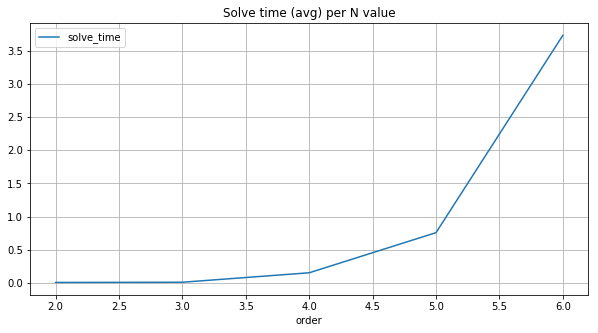

In [10]:
frames.groupby('order').mean().plot(figsize=(10,5),grid=True, title="Solve time (avg) per N value")
plt.savefig("n vs solve time")
pass

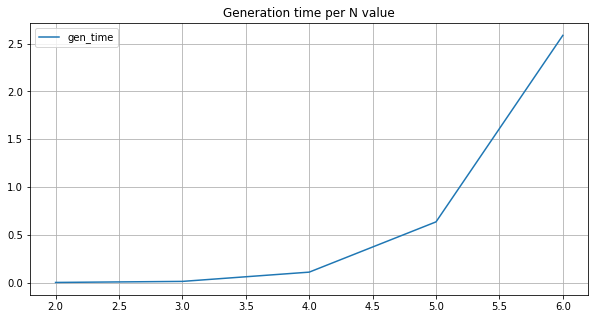

In [13]:
pd.DataFrame.from_dict(gen_times, orient='index', columns=['gen_time']).plot(figsize=(10,5), grid=True, title="Generation time per N value")
plt.savefig("nvgentime")
pass